In [1]:
cd /content/drive/MyDrive/DS2

/content/drive/MyDrive/DS2


In [2]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('./dataset/Preprocessed_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head(3)

,description,origin,status,car_mileage,car_color,car_seats,gear,car_year,car_price,style,model,fuel,brand_name,region_name,url_image,website,month,year,num_null
0,🔹 HÀNG MỚI VỀ\n🔹 BMW 520i \n🔹 MODEL 2016\n🔹 Od...,Đức,Đã sử dụng,50000.0,Đen,4.0,Tự động,2015.0,1.170000e+09,Sedan,5 Series,Xăng,BMW,Hà Nội,https://cdn.chotot.com/namB6E0XkDPkf9h8KoahoRB...,chotot,11,2021,0
1,Bán nissan - Gran Livina nhập khẩu số tự động ...,Nhật Bản,Đã sử dụng,12000.0,Xám,3.0,Tự động,2009.0,2.342500e+08,Minivan (MPV),Grand livina,Xăng,Nissan,Hà Nội,https://cdn.chotot.com/50R_cYWFPAz0wHZqPAGaFr-...,chotot,11,2021,0
2,Auto88 về Mercedes C200 sx 2017 đky 2/2018 chạ...,Việt Nam,Đã sử dụng,30000.0,Xám,2.0,Tự động,2018.0,1.090000e+09,Sedan,C Class,Xăng,Mercedes Benz,Hà Nội,https://cdn.chotot.com/bhfeL3dPtccDnzlKzeAZ88X...,chotot,11,2021,0


In [5]:
data.shape

(65135, 19)

In [6]:
X = torch.load('./dataset/featureDes')
y = data['car_price']

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=768)
tmp = pca.fit_transform(X)

In [9]:
vr = pca.explained_variance_ratio_
variance_explained = []
for i in range(vr.shape[0]):
     variance_explained.append(np.sum(vr[:i])*100) 
# print(variance_explained)

Text(0.5, 1.0, 'Explained variance vs Number of components')

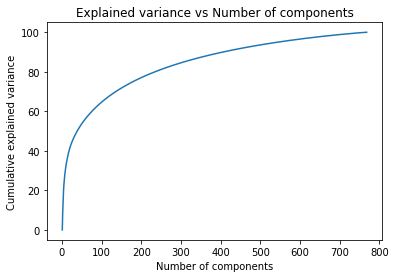

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = range(1,769,1), y=variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [11]:
variance_explained = np.array(variance_explained)
num_comp = np.where(variance_explained>95)[0][0]


Text(0.5, 1.0, 'Explained variance vs Number of components')

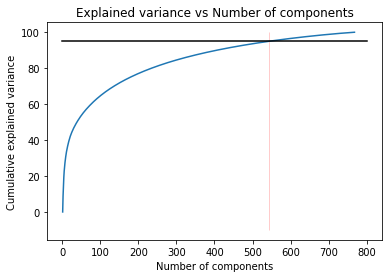

In [59]:
from seaborn import colors
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = range(1,769,1), y=variance_explained)
sns.lineplot(x=[544,544,544],y=[-10,50,100],lw = 5.5,color='red')
sns.lineplot(x=[0,400,800],y=[95,95,95],color='black')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [ ]:
pca = PCA(n_components=num_comp)
resultArr = pca.fit_transform(X)

In [ ]:
resultArr.shape

(65135, 544)

In [ ]:
torch.save(resultArr,'./dataset/pca_des')